## Método Probabilístico
### Leandro León
Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from datetime import datetime,timedelta
from sklearn import linear_model
from scipy.optimize import curve_fit

In [2]:
url = 'covid_19_clean_complete.csv'
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### Una vez leído los datos,filtramos los que se usarán para el método

In [3]:
df = df[df['Country/Region'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['Date','Confirmed', 'Recovered']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['Date']
df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,Date,Confirmed,Recovered
95,21,0,0
356,22,0,0
617,23,0,0
878,24,0,0
1139,25,0,0
...,...,...,...
47858,204,78148,33455
48119,205,79049,34544
48380,206,80036,34544
48641,207,80694,34896


<AxesSubplot:xlabel='Date'>

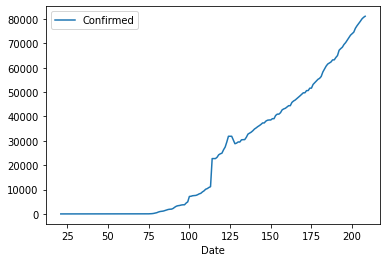

In [11]:
df.plot(x ='Date', y='Confirmed')

#### La grráfica representa como se ha venido dando los contagios desde la fecha 0 

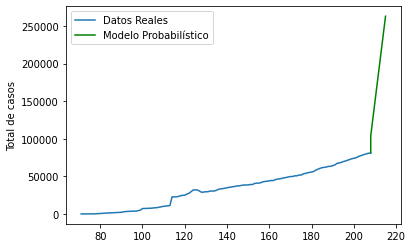

In [12]:
filtro = df["Confirmed"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1])
media = filtro.mean()
mediana = filtro.median()
x4, y4 = [x[-1]], [y[-1]]
for i in range(x[-1], x[-1] + 8):
    x4.append(i)
    y4.append(int(y4[-1] + mediana))
mp.plot(x[50:], y[50:], label="Datos Reales")
mp.plot(x4, y4, label="Modelo Probabilístico", color="green")
mp.legend()
mp.ylabel("Total de casos")
mp.show()

##### Según el modelo, habrá un despunte abrupto de contagios en las próximas semanas

## Parte 2
1. Comparar el modelo de predicion matematico vs probabilidad.
2. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.
3. Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 54, 58, 65, 65, 100, 100, 100, 100, 140, 339, 368, 411, 501, 597, 696, 780, 838, 838, 1008, 1061, 1150, 1207, 1262, 1328, 1366, 1366, 1366, 1557, 1557, 1557, 1558, 1913, 2132, 3300, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3433, 3457, 3557, 3557, 3557, 3557, 3560, 18003, 18003, 18425, 18425, 19190, 19190, 19592, 19592, 20019, 20019, 20019, 20568, 21020, 21020, 21020, 21020, 21862, 21862, 22679, 22865, 23064, 23349, 23684, 23881, 24123, 24446, 24446, 24991, 24991, 24991, 24991, 26097, 26493, 26920, 27058, 27430, 27594, 27887, 28032, 28391, 28507, 28722, 28872, 29071, 29071, 29184, 29577, 30107, 30283, 30369, 30484, 30641, 31260, 31404, 31757, 31901, 31955, 32725, 33125, 33455, 34544, 34544, 34896, 34896, 57615, 80334, 103053, 125772, 148491

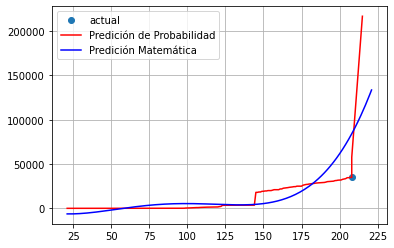

In [21]:
# predicion probabilidad
x = list(df.iloc [:, 0]) # Dias 
y = list(df.iloc [:, 2]) # Total casos
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)

mp.plot(x[-1],y[-1],'o',label='actual')

#predicion a una semana
for i in range(x[-1], x[-1]+8):
    x.append(i)
    y.append(int(y[-1] + mediana))

print(y)    
#predicion matematica 
x1 = np.array(x)
y1 = np.array(y)  
def func_polinomial(x, a, b, c, d):
    return a*x**4 + b*x**3 + c*x**2 + d*x + 1

popt1, pcov1 = curve_fit(func_polinomial, x1, y1)
pred_x = list(range(min(x1),max(x1)+7))

pred_x = np.array(pred_x, dtype=float)




mp.plot(x, y,'red',label='Predición de Probabilidad')
mp.plot(pred_x,func_polinomial(pred_x,*popt1),'blue',label='Predición Matemática')
mp.legend(loc='upper left')
mp.grid(True)
mp.show()

### Se puede observar que el modelo matemático nos da una curva más real de como se irán dando los contagios, auqnue a fin de cuentas ambas nos dan un incremento consderable de los casos 

## Retroceso de 2 semanas y volver a comparar los modelos

62449


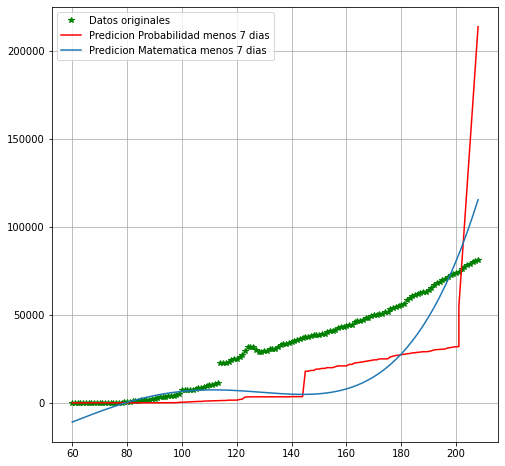

In [31]:
df2 = pd.read_csv('covid_19_clean_complete.csv')
#df2 = df
df2 = df2[df2['Country/Region'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df2 = df2[(df2.Confirmed >= 1)]
df2 = df2.loc[:,['Date', 'Confirmed', 'Recovered']] #Selecciono las columnas de analasis

FMT = '%Y-%m-%d'
date = df2['Date']

df2['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

data = df2[:-7]

#Modelo probablistico
filtro1 = data["Confirmed"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media1 = filtro1.mean()
mediana1 = filtro1.median()

y1 = list(data.iloc [:, 2]) # Total casos
x1 = list(data.iloc [:, 0]) # Dias

#Realizamos un ejemplo de prediccion
prediccion_siguiente1 = int(y1[-1] + mediana1)
print(prediccion_siguiente1)

for i in range(x1[-1], x1[-1]+8):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))


#modelo matematico
x1 = np.array(x1, dtype=float)
y1 = np.array(y1, dtype=float)
def func_polinomial(x, a, b, c, d):
    return a*x**4 + b*x**3 + c*x**2 + d*x + 1

popt1, pcov1 = curve_fit(func_polinomial, x1, y1)

x2 = df2.Date
y2 = df2.Confirmed

mp.figure(figsize=(8,8))
mp.plot(x2, y2,'g*',label='Datos originales')
mp.plot(x1, y1,color='r',label='Predicion Probabilidad menos 7 dias')
mp.plot(x1,func_polinomial(x1,*popt1),label='Predicion Matematica menos 7 dias')
mp.legend(loc='upper left')
mp.grid(True)
mp.show()

En base a la anterior predicción en tiempo real se decía que daban una predicción quizá hasta exagerada, pero dando un vistazo a esta predicción de hace 7 días, nos podemos dar en cuenta que no son exaeradas dichas predicciones y que los casos si han ido en bastante aumento. 
Quizá por la falta de cuidado de la población y la ineptitud de las autoridades de turno. A partir de estos factores, la pandemia ha puesto al país y su población en una situación muy vulnerable.